# 🧩 Fase 6 – Visualización de Datos
Usar matplotlib y pandas para mostrar:
1.	Gráfico de barras: número de pacientes atendidos por servicio.
2.	Gráfico circular: distribución por sexo.
3.	Histograma: distribución de edades.
4.	Reporte tabular: promedio de montos por distrito.

In [1]:
## Librerías
import pandas as pd
from pymongo import MongoClient
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

## 📁 Crear archivo 6_Reportes.ipynb

In [2]:

# 1️⃣ Conectar a MongoDB
client = MongoClient("mongodb://localhost:27017/")
db = client["SaludDigital_2025"]
collection = db["pacientes"]

# 2️⃣ Leer los datos desde MongoDB y convertirlos a DataFrame
data = list(collection.find({}, {"_id": 0}))  # Omitimos el campo _id
df = pd.DataFrame(data)

print("✅ Datos cargados desde MongoDB correctamente.")
print(f"📊 Total de registros: {len(df)}\n")

# 3️⃣ Crear carpeta para guardar gráficos
reports_path = Path.cwd() / "../reports"
reports_path.mkdir(parents=True, exist_ok=True)

# 4️⃣ Vista previa
print("Vista previa de los datos:\n")
print(df.head())

✅ Datos cargados desde MongoDB correctamente.
📊 Total de registros: 3000

Vista previa de los datos:

  id_paciente          nombre  edad sexo    distrito       servicio  \
0        P001     Miguel Díaz    51    M   San Borja      Pediatría   
1        P002  Diego Martínez    78    M   La Molina  Traumatología   
2        P003   Carmen García    21    F  Miraflores     Psicología   
3        P004    Claudia Díaz     9    F   Surquillo  Traumatología   
4        P005     Carlos Díaz    23    M   Surquillo       Urología   

  fecha_atencion   monto  
0     2024-11-29  310.76  
1     2024-10-17  169.10  
2     2024-12-14   93.18  
3     2024-02-09  256.72  
4     2024-08-23  236.87  


## 📊 1. Gráfico de barras: Pacientes atendidos por servicio

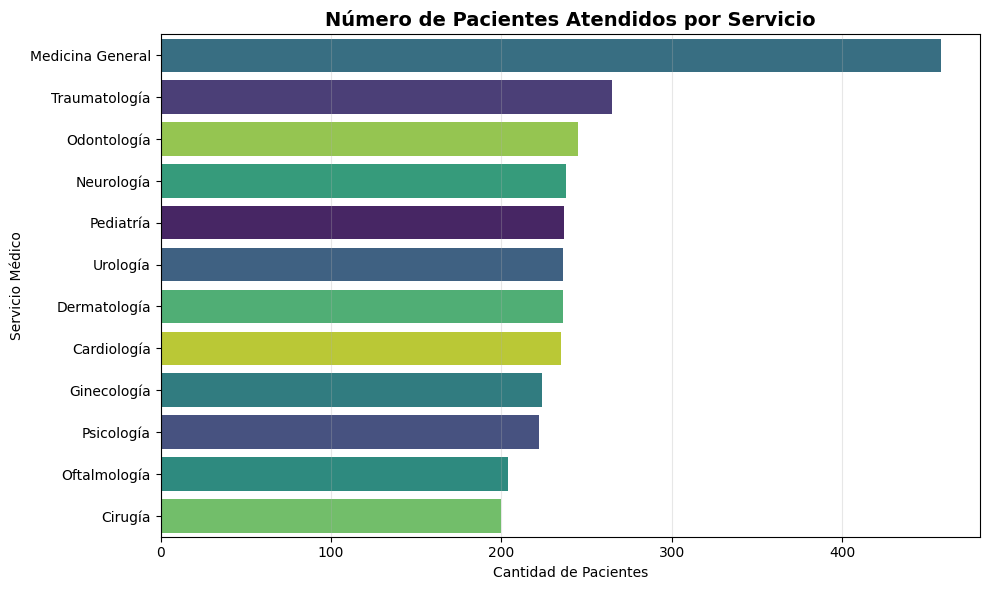

In [4]:
# 📈 1. Gráfico de barras: Número de pacientes atendidos por servicio
plt.figure(figsize=(10, 6))
sns.countplot(
    y="servicio",
    hue="servicio",
    data=df,
    order=df["servicio"].value_counts().index,
    palette="viridis",
    legend=False
)
plt.title("Número de Pacientes Atendidos por Servicio", fontsize=14, fontweight='bold')
plt.xlabel("Cantidad de Pacientes")
plt.ylabel("Servicio Médico")
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.savefig(reports_path / "pacientes_atendidos_por_servicio.png", dpi=300, bbox_inches='tight')
plt.show()

## 🥧 2. Gráfico circular: Distribución por sexo

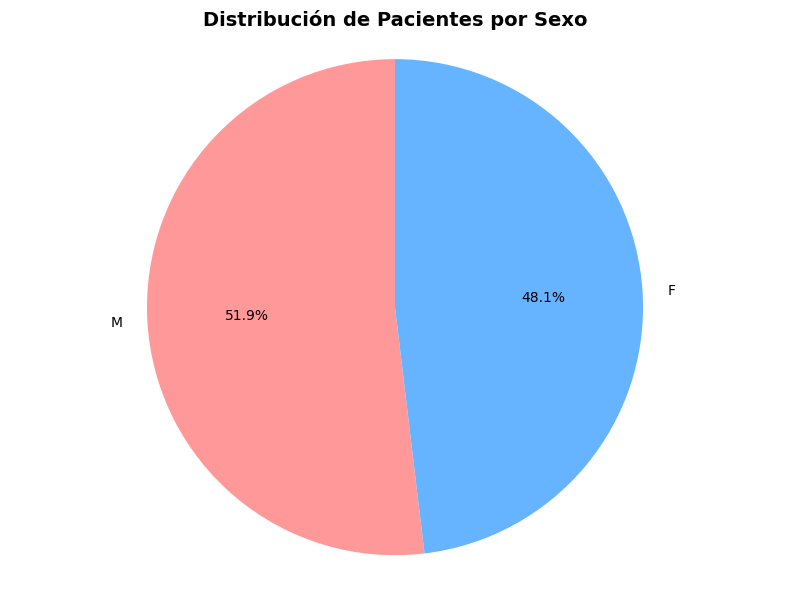

In [5]:
# 🥧 2. Gráfico circular: Distribución por sexo
plt.figure(figsize=(8, 6))
sexo_counts = df['sexo'].value_counts()
colors = ['#ff9999', '#66b3ff']  # Rosa para F, Azul para M

plt.pie(sexo_counts.values, labels=sexo_counts.index, autopct='%1.1f%%', 
        colors=colors, startangle=90)
plt.title('Distribución de Pacientes por Sexo', fontsize=14, fontweight='bold')
plt.axis('equal')  # Para que sea un círculo perfecto
plt.tight_layout()
plt.savefig(reports_path / "distribucion_por_sexo.png", dpi=300, bbox_inches='tight')
plt.show()

## 📊 3. Histograma: Distribución de edades


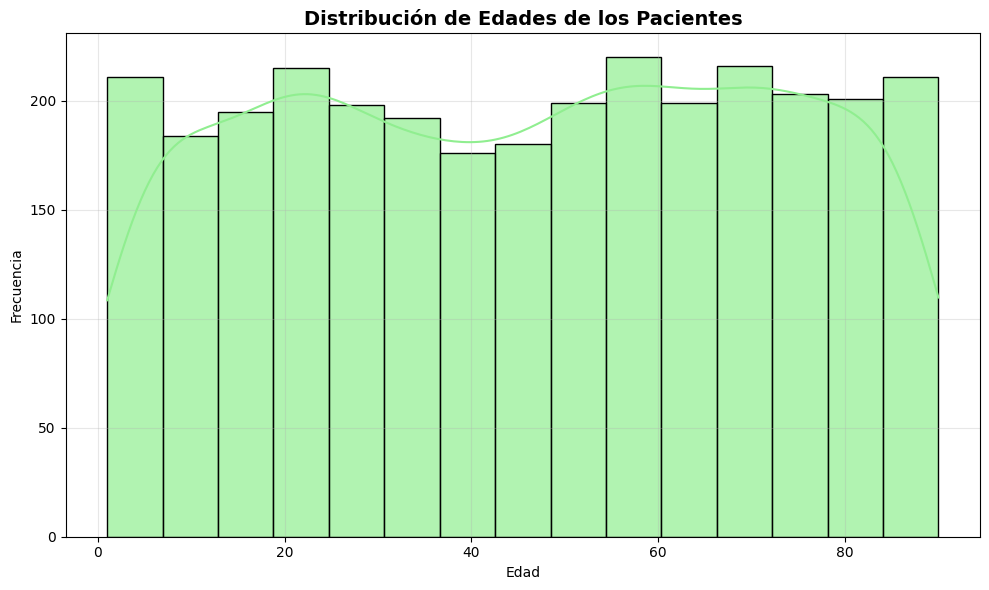

📊 Estadísticas de Edades:
Edad promedio: 45.9 años
Edad mínima: 1 años
Edad máxima: 90 años


In [6]:
# 📊 3. Histograma: Distribución de edades
plt.figure(figsize=(10, 6))
sns.histplot(df["edad"], bins=15, kde=True, color='lightgreen', alpha=0.7)
plt.title("Distribución de Edades de los Pacientes", fontsize=14, fontweight='bold')
plt.xlabel("Edad")
plt.ylabel("Frecuencia")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig(reports_path / "distribucion_de_edades.png", dpi=300, bbox_inches='tight')
plt.show()

# Estadísticas adicionales de edades
print(f"📊 Estadísticas de Edades:")
print(f"Edad promedio: {df['edad'].mean():.1f} años")
print(f"Edad mínima: {df['edad'].min()} años")
print(f"Edad máxima: {df['edad'].max()} años")

## 📋 4. Reporte tabular: Promedio de montos por distrito


💰 REPORTE TABULAR: Promedio de Montos por Distrito
                 Monto Promedio (S/)  Cantidad Pacientes
distrito                                                
Magdalena                     289.24                 221
San Miguel                    283.08                 227
Surquillo                     282.13                 243
San Borja                     281.14                 236
Jesús María                   280.41                 253
Surco                         279.85                 220
San Isidro                    277.20                 222
La Molina                     276.06                 230
No especificado               275.35                 278
Pueblo Libre                  274.96                 215
Lince                         273.86                 231
Miraflores                    264.18                 221
Barranco                      262.34                 203


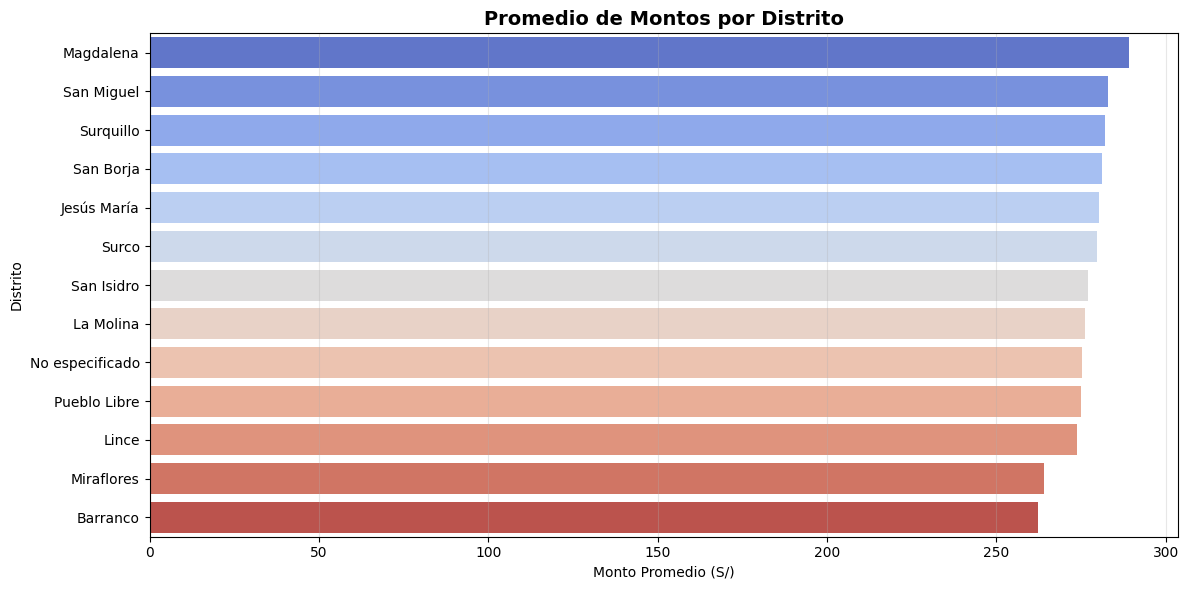

In [7]:
# 📋 4. Reporte tabular: Promedio de montos por distrito
print("\n💰 REPORTE TABULAR: Promedio de Montos por Distrito")
print("=" * 50)

# Calcular promedios
promedio_montos = df.groupby("distrito")["monto"].agg(['mean', 'count']).round(2)
promedio_montos.columns = ['Monto Promedio (S/)', 'Cantidad Pacientes']
promedio_montos = promedio_montos.sort_values('Monto Promedio (S/)', ascending=False)

# Mostrar tabla
print(promedio_montos)

# Gráfico de promedios
plt.figure(figsize=(12, 6))
df_prom = promedio_montos.reset_index()
df_prom.columns = ["Distrito", "MontoPromedio", "Cantidad"]

sns.barplot(
    data=df_prom,
    x="MontoPromedio",
    y="Distrito",
    hue="Distrito",
    palette="coolwarm",
    legend=False
)

plt.title("Promedio de Montos por Distrito", fontsize=14, fontweight='bold')
plt.xlabel("Monto Promedio (S/)")
plt.ylabel("Distrito")
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.savefig(reports_path / "promedio_de_montos_por_distrito.png", dpi=300, bbox_inches='tight')
plt.show()